In [ ]:
#Importing all required libraries

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import tensorflow as tf
import pathlib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [4]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [6]:
tf.__version__

'2.4.0'

In [7]:
#Train and test data folder

train_data_dir = "/home/nguyentansy/PhD-work/Datasets/Image - Split 0-1/1"
test_data_dir = "/home/nguyentansy/PhD-work/Datasets/Image - Split 0-1/0"

In [8]:
train_data_dir = pathlib.Path(train_data_dir)
test_data_dir = pathlib.Path(test_data_dir)

In [9]:
#count how many images are there
image_count = len(list(train_data_dir.glob('*/*.jpg')))
image_count

5338

In [10]:
total_train = len(list(train_data_dir.glob('*/*.jpg')))
total_val = len(list(test_data_dir.glob('*/*.jpg')))

In [11]:
#get the class names
CLASS_NAMES = np.array([item.name for item in train_data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['ulcerative-colitis-grade-2', 'impacted-stool', 'cecum',
       'bbps-2-3', 'bbps-0-1', 'barretts', 'ulcerative-colitis-grade-2-3',
       'esophagitis-b-d', 'polyps', 'esophagitis-a',
       'ulcerative-colitis-grade-1', 'ulcerative-colitis-grade-1-2',
       'ulcerative-colitis-grade-0-1', 'pylorus',
       'dyed-resection-margins', 'retroflex-stomach',
       'dyed-lifted-polyps', 'barretts-short-segment', 'ileum', 'z-line',
       'hemorrhoids', 'ulcerative-colitis-grade-3', 'retroflex-rectum'],
      dtype='<U28')

In [12]:
#Define parameter for training
batch_size = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/batch_size)
epochs = 8
num_classes = len(CLASS_NAMES) #23

In [13]:
#We use image data generators to load the images and prepare them for the training

train_image_generator = ImageDataGenerator() # Generator for our training data
validation_image_generator = ImageDataGenerator() # Generator for our validation data


train_data_gen = train_image_generator.flow_from_directory(directory=str(train_data_dir),
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES),
                                                     class_mode='categorical'
                                                          )

val_data_gen = validation_image_generator.flow_from_directory(directory=str(test_data_dir),
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical',
                                                     classes = list(CLASS_NAMES)
                                                             )
#get class order from directories
print(train_data_gen.class_indices.keys())
print(val_data_gen.class_indices.keys())


Found 5338 images belonging to 23 classes.
Found 5324 images belonging to 23 classes.
dict_keys(['ulcerative-colitis-grade-2', 'impacted-stool', 'cecum', 'bbps-2-3', 'bbps-0-1', 'barretts', 'ulcerative-colitis-grade-2-3', 'esophagitis-b-d', 'polyps', 'esophagitis-a', 'ulcerative-colitis-grade-1', 'ulcerative-colitis-grade-1-2', 'ulcerative-colitis-grade-0-1', 'pylorus', 'dyed-resection-margins', 'retroflex-stomach', 'dyed-lifted-polyps', 'barretts-short-segment', 'ileum', 'z-line', 'hemorrhoids', 'ulcerative-colitis-grade-3', 'retroflex-rectum'])
dict_keys(['ulcerative-colitis-grade-2', 'impacted-stool', 'cecum', 'bbps-2-3', 'bbps-0-1', 'barretts', 'ulcerative-colitis-grade-2-3', 'esophagitis-b-d', 'polyps', 'esophagitis-a', 'ulcerative-colitis-grade-1', 'ulcerative-colitis-grade-1-2', 'ulcerative-colitis-grade-0-1', 'pylorus', 'dyed-resection-margins', 'retroflex-stomach', 'dyed-lifted-polyps', 'barretts-short-segment', 'ileum', 'z-line', 'hemorrhoids', 'ulcerative-colitis-grade-3', '

In [14]:
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# base model from the pre-trained model. Resnet 50 in this case
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False 



In [15]:
#add new classification layer
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(num_classes,activation='softmax')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
#fit the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/8
166/166 [==============================] - 227s 1s/step - loss: 1.4552 - accuracy: 0.5867 - val_loss: 0.5821 - val_accuracy: 0.8215
Epoch 2/8
166/166 [==============================] - 78s 473ms/step - loss: 0.4677 - accuracy: 0.8519 - val_loss: 0.5369 - val_accuracy: 0.8421
Epoch 3/8
166/166 [==============================] - 78s 470ms/step - loss: 0.3715 - accuracy: 0.8774 - val_loss: 0.5594 - val_accuracy: 0.8238
Epoch 4/8
166/166 [==============================] - 78s 472ms/step - loss: 0.2963 - accuracy: 0.9005 - val_loss: 0.4765 - val_accuracy: 0.8462
Epoch 5/8
166/166 [==============================] - 79s 475ms/step - loss: 0.2449 - accuracy: 0.9190 - val_loss: 0.4516 - val_accuracy: 0.8579
Epoch 6/8
166/166 [==============================] - 78s 474ms/step - loss: 0.2170 - accuracy: 0.9267 - val_loss: 0.4954 - val_accuracy: 0.8509
Epoch 7/8
166/166 [==============================] - 79s 475ms/step - loss: 0.1962 - accuracy: 0.9354 - val_loss: 0.4839 - val_accuracy: 0

ValueError: x and y must have same first dimension, but have shapes (8,) and (11,)

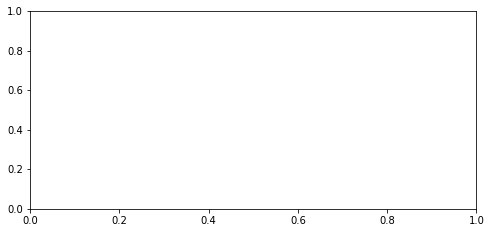

In [41]:
#create training plots
history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
base_model.trainable = True #now we want to train the base model

In [25]:
# How many layers are in the base model
print("Layers base model: ", len(base_model.layers))

# Fine tune from layer x
fine_tune_at = 100

# Freeze all the layers before the fine tune starting layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Layers base model:  175


In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [28]:
#Fine tune step
initial_epochs = 7
fine_tune_epochs = 3
total_epochs =  initial_epochs + fine_tune_epochs
train_batches = total_train // batch_size
print(total_val // batch_size)
validation_batches = total_val // batch_size

history_fine = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=total_epochs,
    initial_epoch = history.epoch[-1],
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

166
Epoch 8/10
166/166 [==============================] - 83s 478ms/step - loss: 0.4723 - accuracy: 0.8520 - val_loss: 1.6213 - val_accuracy: 0.8084
Epoch 9/10
166/166 [==============================] - 79s 475ms/step - loss: 0.1046 - accuracy: 0.9647 - val_loss: 1.2843 - val_accuracy: 0.8581
Epoch 10/10
166/166 [==============================] - 79s 476ms/step - loss: 0.0450 - accuracy: 0.9892 - val_loss: 1.6866 - val_accuracy: 0.8353


In [29]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

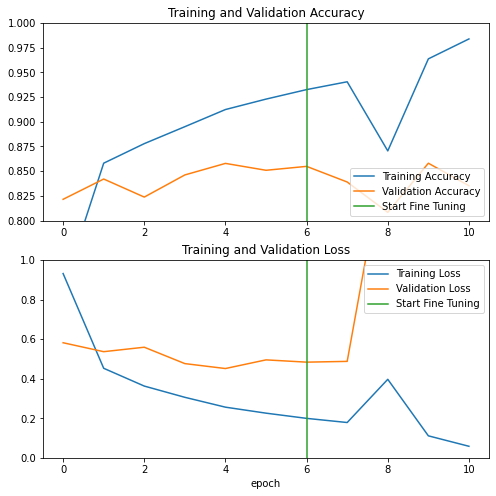

In [30]:
#Plot fine tuning 
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [31]:
#model save and load
import os

In [39]:
#some time stamp 
from datetime import datetime
# current date and time.
now = datetime.now()
timestamp = datetime.timestamp(now)
print("timestamp =", timestamp)

timestamp = 1614681130.41083


In [40]:
model_filename = str(timestamp)+'mymodel.h5'
model.save(model_filename)

In [42]:
#To apply the model on new data
new_model = tf.keras.models.load_model(model_filename)

# Show the model architecture
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [43]:
from tensorflow.keras.preprocessing import image

#image directory containing images to test
img_dir="/home/nguyentansy/PhD-work/Datasets/all/0/polyps"

for i,img in enumerate(os.listdir(img_dir)):
  tmpimage = image.load_img(os.path.join(img_dir,img), target_size=(IMG_SIZE,IMG_SIZE))   
  tmpimage = np.expand_dims(tmpimage, axis=0).astype('float32')    
  result_class=new_model.predict(tmpimage)
  print(img,";",CLASS_NAMES[result_class.argmax(axis=-1)])


02cac873-236f-40bd-a32a-811d6f8fac4c.jpg ; ['polyps']
65c26c87-2c32-4aa3-9a64-33ac08c90245.jpg ; ['polyps']
39ab53ac-5b71-40de-bf32-4f020211ac73.jpg ; ['polyps']
262e3e7c-0463-4af6-b02a-a4ceb8387148.jpg ; ['polyps']
4f1f2099-aedb-444e-a668-ae35957d98be.jpg ; ['polyps']
a51ae4a0-6dd8-4d47-a91f-e0e86190b55f.jpg ; ['polyps']
19d0d3bb-5d6c-4ac4-be99-47b9517c8927.jpg ; ['polyps']
cadc936c-2be0-45ad-a855-9b76293adc3c.jpg ; ['polyps']
e7c945cc-5dad-4414-9980-2e85c8768733.jpg ; ['polyps']
e84d8404-b3d7-40c6-837b-27e01e553d48.jpg ; ['polyps']
158acc62-d250-428e-b62a-7785f8f32883.jpg ; ['polyps']
581f76d4-9147-44a5-8331-118b379604dc.jpg ; ['polyps']
9e190bbd-107d-45fd-b840-9ae64527f69b.jpg ; ['polyps']
45a240fb-1588-4aa9-9b22-65552ee5ab4b.jpg ; ['polyps']
338a5a4e-8ca5-4ddf-b7ec-5c9a5d59c4cd.jpg ; ['polyps']
6ff0840c-7332-4cbc-998d-defa88e89381.jpg ; ['polyps']
b0d3e1e3-a02e-496f-bf11-faa820e17d84.jpg ; ['polyps']
9063470c-74c6-4124-968f-5d60c60730a1.jpg ; ['polyps']
4f6384a7-a909-4636-a951-95ff

be2b6b44-d5dc-44ce-a0de-bdbe0a88068a.jpg ; ['polyps']
3d697e4d-dec1-48d5-a325-5f588722181d.jpg ; ['polyps']
9a8bdb7c-bfa7-4048-a342-4b98d457660c.jpg ; ['polyps']
0d614b74-8680-46ba-998d-e96cd404da19.jpg ; ['retroflex-rectum']
8c405810-c583-4033-9ed0-9858b264a770.jpg ; ['polyps']
f45f850b-1cfc-43cb-8735-3bc6364b4eea.jpg ; ['polyps']
f2bdf89f-5ae2-44f4-b417-b791068b72ab.jpg ; ['polyps']
a03be693-637a-458e-9afe-fdc1c0619b46.jpg ; ['polyps']
df6032b3-1f9d-4fa2-a14c-28492ecf5d5c.jpg ; ['polyps']
4e7a390c-a337-4553-86c9-69713eeb6089.jpg ; ['polyps']
27be67e5-d8ad-4490-b528-d66eeb55d651.jpg ; ['polyps']
4cf65c05-5568-463f-aa07-7ad9bd4a1216.jpg ; ['polyps']
259c427a-f1ef-4105-acd5-507cef1ef425.jpg ; ['polyps']
bc02e3ed-94af-402e-a860-9686af5af550.jpg ; ['polyps']
e93df598-8a36-48e6-aebd-1c1357b466ad.jpg ; ['polyps']
a9e850a2-127c-4842-9908-2639d5b41005.jpg ; ['polyps']
58811a43-26fa-45e1-af82-a309ddda60c7.jpg ; ['polyps']
2fd93007-efdf-455c-8eee-970ab9b939bc.jpg ; ['polyps']
68c5badf-03f7-4b04

36448361-f38c-486d-a404-8251e657df28.jpg ; ['polyps']
955c65a5-47ea-4972-8cac-e3a63a7ba760.jpg ; ['polyps']
aad08a6b-c8ec-4388-a543-00d550315c1d.jpg ; ['polyps']
c778b13f-b445-4d21-a4b6-c46905bd6bf5.jpg ; ['polyps']
e61faa7b-029d-4c5b-9d2d-f29b6ea52b56.jpg ; ['polyps']
35a14482-d72e-4480-88f5-23657c3388bf.jpg ; ['polyps']
891b98a9-ec04-429c-89a9-80862dcc9f76.jpg ; ['polyps']
67d97797-e9da-44ee-9346-b953178d1ec5.jpg ; ['polyps']
5166c1a5-cb31-453d-a319-d30c80d9b78f.jpg ; ['polyps']
7569c7ef-5ac5-4b9f-ad96-62b5642495f5.jpg ; ['polyps']
77ddd87e-1790-47c9-9c63-bbb74f532dbc.jpg ; ['polyps']
57383272-5fa6-426a-bbb0-4e3f9b609394.jpg ; ['polyps']
acdb243d-0e1e-4f08-95e3-f0a6ce95e6fa.jpg ; ['polyps']
ad6de96f-0441-4e78-add7-6d452037784d.jpg ; ['polyps']
8fe8a08b-efef-4c71-b95d-f2edc5902f6b.jpg ; ['polyps']
65182d0e-0200-458a-b344-892bcc83403d.jpg ; ['polyps']
32295c17-aa2b-4e7a-9d88-39b1dfd8d63c.jpg ; ['polyps']
e9401776-6d85-4723-abdd-9705d82fcdb0.jpg ; ['polyps']
968c5d22-d7f1-47bb-bded-9931

f5cb659d-9e0f-4d92-a0d1-a24ba889121d.jpg ; ['polyps']
5252b288-3af4-4182-adb7-423c194bad79.jpg ; ['polyps']
3e055bf6-58ed-41b7-a02f-26f58cd357a9.jpg ; ['polyps']
a0a412a3-b5b1-4e07-ac9c-718babcd3bc4.jpg ; ['polyps']
2ec204f5-4f66-43b9-aa8b-36e46ad6c253.jpg ; ['polyps']
52f2dece-36d0-4199-83e3-a9acd6bcd477.jpg ; ['polyps']
22b8c0d3-af11-4969-a348-8bc7a1157d68.jpg ; ['polyps']
e1a47a88-427c-41f6-9dcd-4e94205aca85.jpg ; ['polyps']
53766635-9121-4447-87a2-7a413ea76ca3.jpg ; ['polyps']
9d64113d-c312-4c30-b99f-55736567ce81.jpg ; ['polyps']
734da276-64da-405a-9f49-efcfa361d33e.jpg ; ['polyps']
66b2df47-cf41-4ded-96c0-e9470994460b.jpg ; ['polyps']
003883b8-e23a-4bf8-a4b9-5f2a30b9e684.jpg ; ['ulcerative-colitis-grade-2']
63f72872-cb2a-43e2-a8cb-dd102068e8a5.jpg ; ['polyps']
b1aade3b-e0ee-47e3-97a9-570ed08bb3b4.jpg ; ['polyps']
5522bd5b-1f5e-4887-b768-41391660ca00.jpg ; ['polyps']
d05ef2f2-603d-432f-b7fb-edf0101967bd.jpg ; ['polyps']
16a97173-c081-4830-a97c-e1064f4c033e.jpg ; ['polyps']
07f2a0b9